In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data = keras.datasets.imdb

In [3]:
max_word = 10000

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data(num_words=max_word)

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# data.get_word_index()

((25000,), (25000,), (25000,), (25000,))

In [6]:
[len(x) for x in x_train]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [7]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)

In [8]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [9]:
test = 'i am a student'

In [10]:
dict((word, test.split().index(word)) for word in test.split())

{'a': 2, 'am': 1, 'i': 0, 'student': 3}

In [11]:
model = keras.models.Sequential()

In [12]:
model.add(layers.Embedding(10000, 50, input_length=300))

In [13]:
model.add(layers.GlobalAveragePooling1D())

In [14]:
model.add(layers.Dense(32, activation='relu'))

In [15]:
model.add(layers.Dropout(0.5))

In [16]:
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                1632      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 501,665
Trainable params: 501,665
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [19]:
history = model.fit(x_train,y_train,epochs=15,batch_size=256,validation_data=(x_test,y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 4s 167us/sample - loss: 0.6827 - acc: 0.6038 - val_loss: 0.6559 - val_acc: 0.7369
Epoch 2/15
25000/25000 [==============================] - 3s 122us/sample - loss: 0.5774 - acc: 0.7706 - val_loss: 0.4848 - val_acc: 0.8414
Epoch 3/15
25000/25000 [==============================] - 3s 120us/sample - loss: 0.4090 - acc: 0.8515 - val_loss: 0.3601 - val_acc: 0.8613
Epoch 4/15
25000/25000 [==============================] - 3s 117us/sample - loss: 0.3186 - acc: 0.8812 - val_loss: 0.3127 - val_acc: 0.8759
Epoch 5/15
25000/25000 [==============================] - 3s 115us/sample - loss: 0.2721 - acc: 0.9010 - val_loss: 0.2944 - val_acc: 0.8819
Epoch 6/15
25000/25000 [==============================] - 3s 118us/sample - loss: 0.2393 - acc: 0.9143 - val_loss: 0.2865 - val_acc: 0.8832
Epoch 7/15
25000/25000 [==============================] - 3s 120us/sample - loss: 0.2188 - acc: 0.9232 - val_l

In [20]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

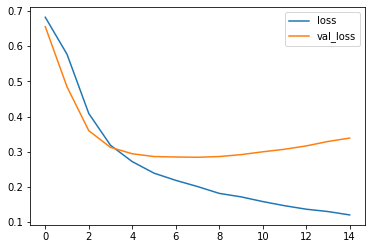

In [22]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

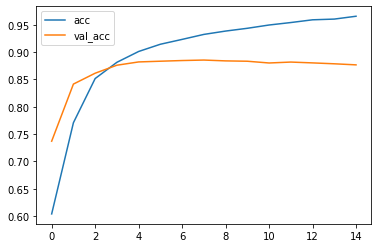

In [23]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()